<a href="https://colab.research.google.com/github/petron23/ML_random_projects/blob/main/Classifications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Binary classification

In [1]:
import torch
from sklearn.datasets import make_circles
from torch import nn

coordinates/features: [0.83619806 0.03563148] class: 1


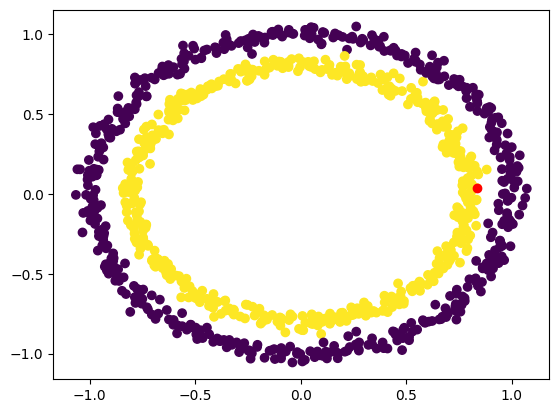

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
n_samples = 1000
X, y = make_circles(n_samples,
                    noise=0.03, 
                    random_state=1) 

import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y);
plt.scatter(x=X[0, 0], 
            y=X[0, 1], 
            c="Red");

print(r"coordinates/features:", X[0], "class:", y[0])


In [3]:
#turn the data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=1)

len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [4]:
from torch import nn
class ClassifyCircles(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1) 
        self.relu = nn.ReLU()

    def forward(self, x):
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model = ClassifyCircles().to(device)
print(model)

ClassifyCircles(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [5]:
#optimizer and loss
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

#accuracy function
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [6]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))     
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Validation
    model.eval()
    with torch.inference_mode():
      test_logits = model(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    #Results
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70055, Accuracy: 50.38% | Test Loss: 0.70429, Test Accuracy: 48.50%
Epoch: 100 | Loss: 0.69036, Accuracy: 50.00% | Test Loss: 0.69007, Test Accuracy: 50.50%
Epoch: 200 | Loss: 0.68778, Accuracy: 52.88% | Test Loss: 0.68704, Test Accuracy: 54.50%
Epoch: 300 | Loss: 0.68456, Accuracy: 54.37% | Test Loss: 0.68341, Test Accuracy: 55.50%
Epoch: 400 | Loss: 0.67987, Accuracy: 55.62% | Test Loss: 0.67829, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.67212, Accuracy: 58.63% | Test Loss: 0.67038, Test Accuracy: 58.00%
Epoch: 600 | Loss: 0.65730, Accuracy: 65.00% | Test Loss: 0.65700, Test Accuracy: 67.50%
Epoch: 700 | Loss: 0.62826, Accuracy: 89.38% | Test Loss: 0.63145, Test Accuracy: 84.50%
Epoch: 800 | Loss: 0.57440, Accuracy: 95.75% | Test Loss: 0.58242, Test Accuracy: 92.50%
Epoch: 900 | Loss: 0.48383, Accuracy: 98.12% | Test Loss: 0.49363, Test Accuracy: 96.50%


In [7]:
#improved model1
import torch
import torch.nn as nn
import torch.optim as optim

class ClassifyCircles_2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=64)
        self.layer_2 = nn.Linear(in_features=64, out_features=64)
        self.layer_3 = nn.Linear(in_features=64, out_features=1)
        self.activation = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.5)
        self.batch_norm_1 = nn.BatchNorm1d(64)
        self.batch_norm_2 = nn.BatchNorm1d(64)
        self.initialize_weights()

    def forward(self, x):
        x = self.layer_1(x)
        x = self.batch_norm_1(x)
        x = self.activation(x)
        x = self.dropout(x)
        x = self.layer_2(x)
        x = self.batch_norm_2(x)
        x = self.activation(x)
        x = self.dropout(x)
        x = self.layer_3(x)
        return x

    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.zeros_(m.bias)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_2 = ClassifyCircles_2().to(device)

# Define the optimizer and learning rate
optimizer = optim.Adam(model_2.parameters(), lr=0.001)

# Define the loss function
loss_fn = nn.BCEWithLogitsLoss()

print(model_2)


ClassifyCircles_2(
  (layer_1): Linear(in_features=2, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_3): Linear(in_features=64, out_features=1, bias=True)
  (activation): LeakyReLU(negative_slope=0.01)
  (dropout): Dropout(p=0.5, inplace=False)
  (batch_norm_1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm_2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [8]:
torch.manual_seed(42)
epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    y_logits = model_2(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))     
    loss = loss_fn(y_logits, y_train) 
    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    ### Validation
    model_2.eval()
    with torch.inference_mode():
      test_logits = model_2(X_test).squeeze()
      test_pred = torch.round(torch.sigmoid(test_logits))
      test_loss = loss_fn(test_logits, y_test)
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    #Results
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.83429, Accuracy: 51.00% | Test Loss: 0.68863, Test Accuracy: 59.50%
Epoch: 100 | Loss: 0.41401, Accuracy: 99.62% | Test Loss: 0.41647, Test Accuracy: 99.50%
Epoch: 200 | Loss: 0.04022, Accuracy: 100.00% | Test Loss: 0.04732, Test Accuracy: 99.50%
Epoch: 300 | Loss: 0.01219, Accuracy: 100.00% | Test Loss: 0.01890, Test Accuracy: 99.50%
Epoch: 400 | Loss: 0.00628, Accuracy: 100.00% | Test Loss: 0.01318, Test Accuracy: 99.50%
Epoch: 500 | Loss: 0.00387, Accuracy: 100.00% | Test Loss: 0.01162, Test Accuracy: 99.50%
Epoch: 600 | Loss: 0.00266, Accuracy: 100.00% | Test Loss: 0.01042, Test Accuracy: 99.50%
Epoch: 700 | Loss: 0.00193, Accuracy: 100.00% | Test Loss: 0.00968, Test Accuracy: 99.50%
Epoch: 800 | Loss: 0.00147, Accuracy: 100.00% | Test Loss: 0.00926, Test Accuracy: 99.50%
Epoch: 900 | Loss: 0.00115, Accuracy: 100.00% | Test Loss: 0.00887, Test Accuracy: 99.50%


In [9]:
# Let's see how it works
import numpy as np
import matplotlib.pyplot as plt

def plot_decision_boundary(model, features, labels):
    """Plots decision boundaries of a model predicting on features in comparison to labels."""
    # Move model and data to CPU
    device = "cpu"
    model.to("cpu")
    features, labels = features.to("cpu"), labels.to("cpu")

    # Define the boundaries and create a grid
    x_min, x_max = features[:, 0].min() - 0.1, features[:, 0].max() + 0.1
    y_min, y_max = features[:, 1].min() - 0.1, features[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Prepare features for prediction
    features_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float().to(device)

    # Make predictions
    model.eval()
    with torch.no_grad():
        logits = model(features_to_pred_on)

    # Determine the predicted labels based on the problem type
    if len(torch.unique(labels)) > 2:
        predicted_labels = torch.softmax(logits, dim=1).argmax(dim=1)  # Multi-class
    else:
        predicted_labels = torch.round(torch.sigmoid(logits))  # Binary

    # Reshape predicted labels and create a filled contour plot
    predicted_labels = predicted_labels.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, predicted_labels, cmap=plt.cm.coolwarm, alpha=0.7)

    # Plot the original data points with color-coded labels
    unique_labels = torch.unique(labels)
    colors = plt.cm.coolwarm(np.linspace(0, 1, len(unique_labels)))
    for i, label in enumerate(unique_labels):
        indices = (labels == label).nonzero(as_tuple=True)[0]
        plt.scatter(features[indices, 0], features[indices, 1], color=colors[i], label=f"Class {int(label)}")

    # Set plot limits and add legend
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.legend()

    # Restore the model to the original device
    model.to(device)

    # Add a title to the plot
    plt.title("Decision Boundaries")


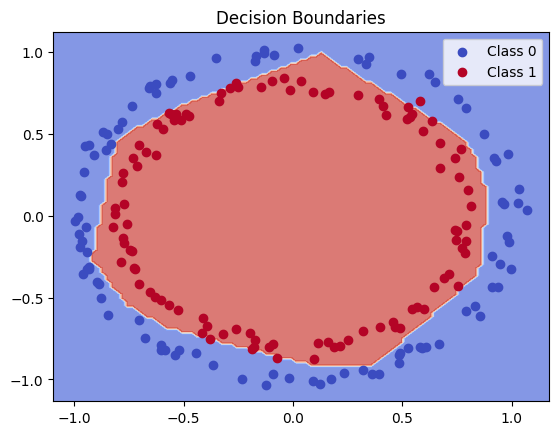

In [10]:
plot_decision_boundary(model,X_test,y_test)

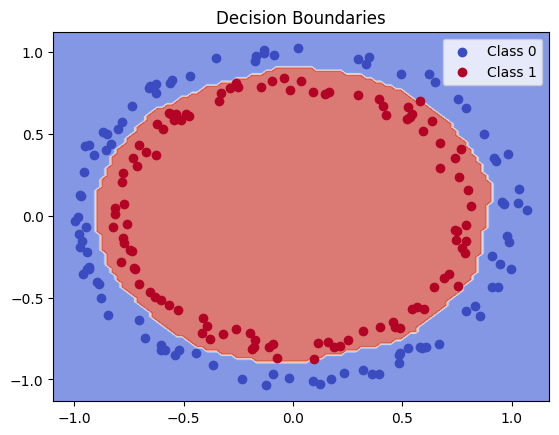

In [11]:
plot_decision_boundary(model_2,X_test,y_test)

## Multi-class classification

Creating new non-linearly separable data

In [35]:
#importing the dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

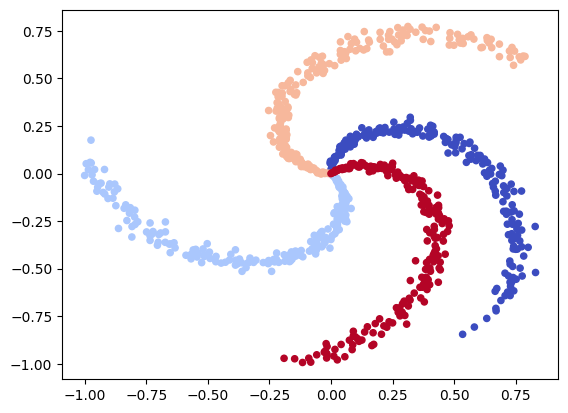

In [36]:
import numpy as np
num_samp = 200 
dim = 2 
classes = 4
X = np.zeros((num_samp*classes,dim)) 
y = np.zeros(num_samp*classes, dtype='uint8') 
for j in range(classes):
  index = range(num_samp*j,num_samp*(j+1))
  r = np.linspace(0.0,1,num_samp) # radius
  t = np.linspace(j*3,(j+1)*3,num_samp) + np.random.randn(num_samp)*0.1 # theta
  X[index] = np.c_[r*np.sin(.8*t), r/1*np.cos(.8*t)]
  y[index] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, cmap=plt.cm.coolwarm)
plt.show()

In [58]:
X_spiral = torch.from_numpy(X).type(torch.float)
y_spiral = torch.from_numpy(y).type(torch.LongTensor)
print(X_spiral[200:205], y_spiral[200:205])

print(X_spiral[:5], y_spiral[:5])

tensor([[ 0.0000, -0.0000],
        [ 0.0035, -0.0036],
        [ 0.0049, -0.0088],
        [ 0.0090, -0.0121],
        [ 0.0128, -0.0155]]) tensor([1, 1, 1, 1, 1])
tensor([[ 0.0000e+00,  0.0000e+00],
        [ 5.0792e-05,  5.0249e-03],
        [-9.2147e-04,  1.0008e-02],
        [ 1.3335e-03,  1.5016e-02],
        [ 8.3317e-05,  2.0100e-02]]) tensor([0, 0, 0, 0, 0])


In [59]:
X_spiral_train, X_spiral_test, y_spiral_train, y_spiral_test = train_test_split(
    X_spiral,
    y_spiral,
    test_size=0.2,
    random_state=23
)

In [60]:
print(X_spiral_train[:5], y_spiral_train[:5])

tensor([[ 0.3699,  0.7701],
        [-0.2146,  0.4038],
        [ 0.0090, -0.0121],
        [-0.2456,  0.1997],
        [ 0.7416, -0.3819]]) tensor([2, 2, 1, 2, 0])


In [61]:
#setting up the device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [119]:
from torch import nn
import torch.nn.init as init
import torch.nn.functional as F

import torch.nn.init as init

class SpiralModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8, dropout_rate=0.1):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
        self.batch_norm = nn.BatchNorm1d(hidden_units)
        self.initialize_weights()
    
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                init.xavier_uniform_(m.weight)
                init.zeros_(m.bias)
    
    def forward(self, x):
        x = self.linear_layer_stack(x)
        #x = self.batch_norm(x)
        return x


model_3 = SpiralModel(input_features=dim, 
                    output_features=classes, 
                    hidden_units=16).to(device)
model_3

SpiralModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=16, out_features=16, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1, inplace=False)
    (6): Linear(in_features=16, out_features=4, bias=True)
  )
  (batch_norm): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [120]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_3.parameters(), 
                            lr=0.1)

In [121]:
model_3(X_spiral_train.to(device))[:5]

tensor([[-0.0470,  0.2514,  0.3642, -0.1369],
        [ 0.0309,  0.0405,  0.0601, -0.0024],
        [-0.0006,  0.0009,  0.0054,  0.0037],
        [-0.0022,  0.0041,  0.0027, -0.0060],
        [-0.2725,  0.0861,  0.4220, -0.0908]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [122]:
torch.manual_seed(42)
epochs = 1000

X_spiral_train, y_spiral_train = X_spiral_train.to(device), y_spiral_train.to(device)
X_spiral_test, y_spiral_test = X_spiral_test.to(device), y_spiral_test.to(device)

for epoch in range(epochs):
  model_3.train()
  y_logits = model_3(X_spiral_train)
  y_pred = torch.softmax(y_logits, dim =1 ).argmax(dim=1)
  loss = loss_fn(y_logits, y_spiral_train)
  acc = accuracy_fn(y_true = y_spiral_train,
                    y_pred = y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_spiral_test)
    test_pred = torch.softmax(test_logits, dim =1 ).argmax(dim=1)
    test_acc = accuracy_fn(y_true = y_spiral_test,
                          y_pred = test_pred)


  if epoch % 50 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.41860, Acc: 33.28% | Test Loss: 0.00865, Test Acc: 35.00%
Epoch: 50 | Loss: 1.19282, Acc: 59.53% | Test Loss: 0.00865, Test Acc: 53.75%
Epoch: 100 | Loss: 0.90763, Acc: 64.69% | Test Loss: 0.00865, Test Acc: 60.00%
Epoch: 150 | Loss: 0.73477, Acc: 70.00% | Test Loss: 0.00865, Test Acc: 66.25%
Epoch: 200 | Loss: 0.69182, Acc: 67.34% | Test Loss: 0.00865, Test Acc: 71.25%
Epoch: 250 | Loss: 0.61603, Acc: 72.50% | Test Loss: 0.00865, Test Acc: 75.00%
Epoch: 300 | Loss: 0.56152, Acc: 75.94% | Test Loss: 0.00865, Test Acc: 81.25%
Epoch: 350 | Loss: 0.53412, Acc: 78.75% | Test Loss: 0.00865, Test Acc: 81.88%
Epoch: 400 | Loss: 0.50050, Acc: 78.12% | Test Loss: 0.00865, Test Acc: 88.12%
Epoch: 450 | Loss: 0.46521, Acc: 81.41% | Test Loss: 0.00865, Test Acc: 89.38%
Epoch: 500 | Loss: 0.45016, Acc: 80.94% | Test Loss: 0.00865, Test Acc: 91.88%
Epoch: 550 | Loss: 0.41190, Acc: 87.34% | Test Loss: 0.00865, Test Acc: 94.38%
Epoch: 600 | Loss: 0.37054, Acc: 87.50% | Test Loss: 0.

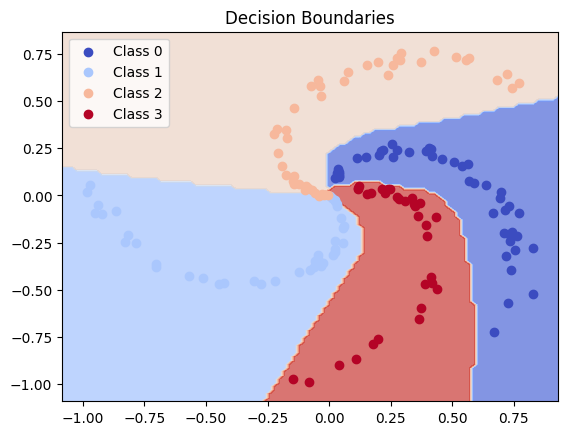

In [123]:
plot_decision_boundary(model_3, X_spiral_test, y_spiral_test)